## Libraries

For creating this chart, we will need to load the following libraries:

- [matplotlib](https://python-graph-gallery.com) for creatin the chart


In [4]:
import matplotlib.pyplot as plt

# set a higher resolution
plt.rcParams['figure.dpi'] = 200

## Coordinates

[Matplotlib](/matplotlib) provides a way to change and specify which coordinates system to use with exhaustive possibilites:

- the figure?
- the axes?
- the data?
- via pixels?
- other?


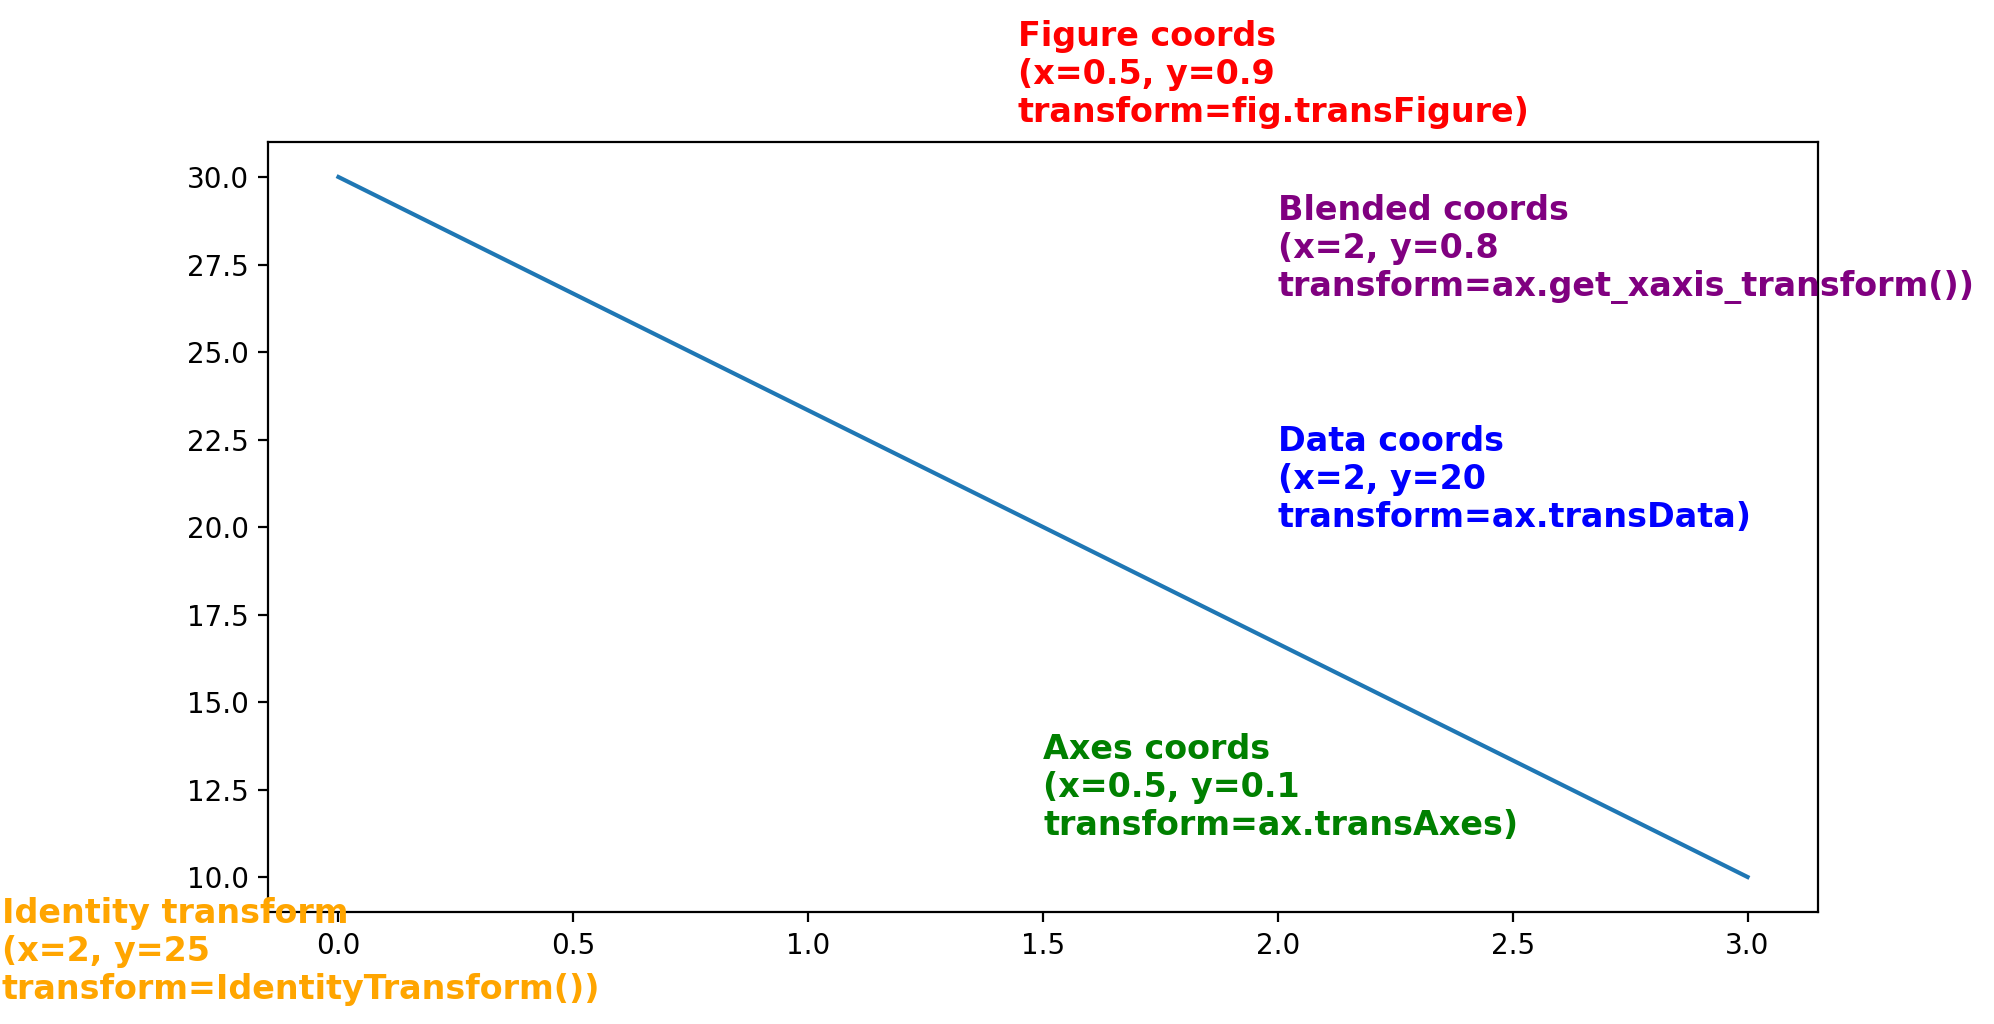

In [59]:
import matplotlib.pyplot as plt
from matplotlib.transforms import IdentityTransform

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot([0, 3], [30, 10])

# Data coordinates (default)
ax.text(2, 20, 'Data coords\n(x=2, y=20\ntransform=ax.transData)', color='blue', fontweight='bold', fontsize=12)

# Axes coordinates
ax.text(0.5, 0.1, 'Axes coords\n(x=0.5, y=0.1\ntransform=ax.transAxes)', transform=ax.transAxes, color='green', fontweight='bold', fontsize=12)

# Figure coordinates
ax.text(0.5, 0.9, 'Figure coords\n(x=0.5, y=0.9\ntransform=fig.transFigure)', transform=fig.transFigure, color='red', fontweight='bold', fontsize=12)

# Blended transformation: x in data coordinates, y in axes coordinates
trans = ax.get_xaxis_transform()  # x in data, y in axes
ax.text(2, 0.8, 'Blended coords\n(x=2, y=0.8\ntransform=ax.get_xaxis_transform())', transform=trans, color='purple', fontweight='bold', fontsize=12)

# Identity transform
ax.text(2, 25, 'Identity transform\n(x=2, y=25\ntransform=IdentityTransform())', transform=IdentityTransform(), color='orange', fontweight='bold', fontsize=12)

plt.show()


Don't worry if this is confusing, we will go over each of these cases in the following sections.


## Quick reminder on figure and axes

In [Matplotlib](/matplotlib), the figure is the top-level container that **holds all the elements** of the chart. It is the canvas on which the chart is drawn. The axes are the **actual plot**. They are the region of the figure where the data is plotted.

One figure can contains **one or multiple axes**. In the case of multiple axes, they can be arranged in a grid, like in a subplot.

Here is an example of a figure with 2 (empty) axes:

![](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/graph/figure-explanations.png)

Reproduce it with:

```python
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.show()
```


## Data coordinates: ax.transData

The data coordinate system is the one that is used to plot the data. For example, if you create a [scatter plot](/scatter-plot) with x=[1,2,3] and y=[4,5,6], the data coordinate system will be the one that goes from 1 to 3 on the x-axis and from 4 to 6 on the y-axis.

It's the default coordinate system used by [Matplotlib](/matplotlib) when you plot data. You can access it with `ax.transData`. Let's see an example:

_Note: we specify `transform=ax.transData` but since it's the default one, you can omit it._


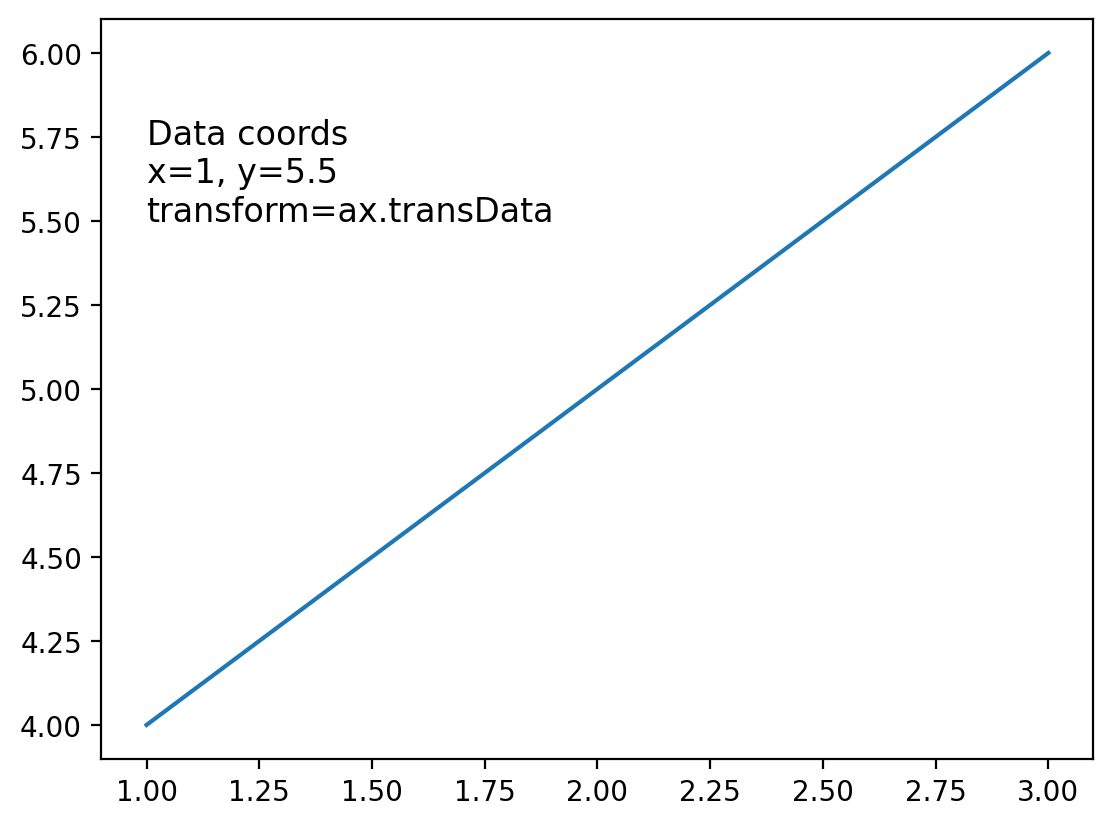

In [61]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots()
ax.plot(x, y)

# Data coordinates
ax.text(
   x=1, y=5.5,
   s='Data coords\nx=1, y=5.5\ntransform=ax.transData',
   transform=ax.transData,
   fontsize=12
)

plt.show()

## Axes coordinates: ax.transAxes

The axes coordinate system is the one that goes from 0 to 1 on each axis.

In this case, the positions will be relative to the axes.


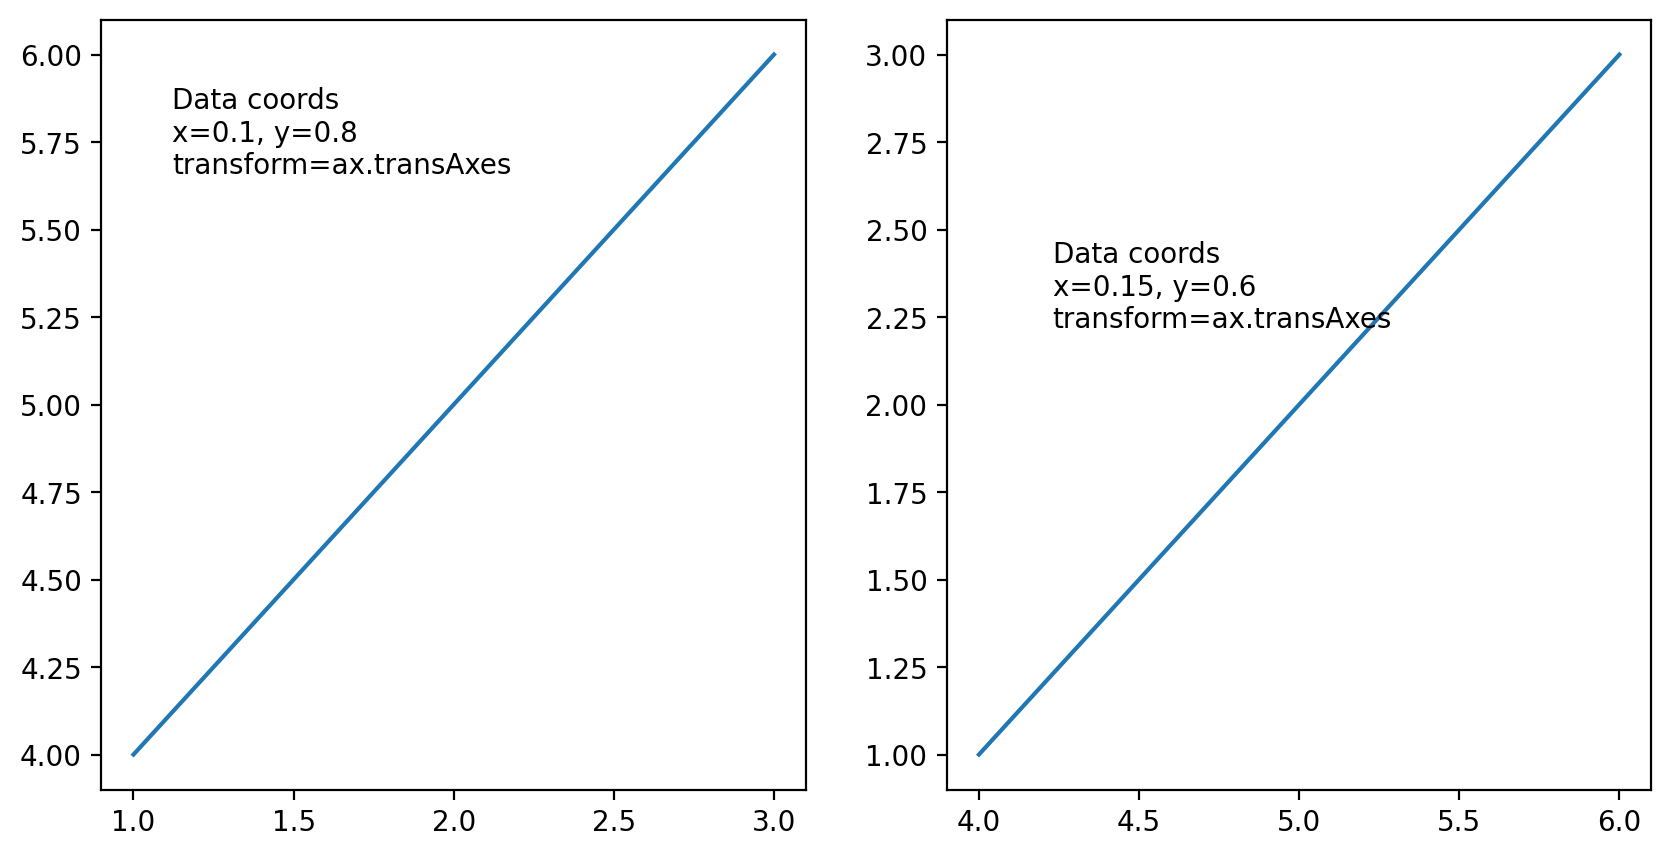

In [71]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Axes coordinates for left subplot
ax[0].text(
   x=0.1, y=0.8,
   s='Data coords\nx=0.1, y=0.8\ntransform=ax.transAxes',
   transform=ax[0].transAxes,
   fontsize=10,
)

# Axes coordinates for right subplot
ax[1].text(
   x=0.15, y=0.6,
   s='Data coords\nx=0.15, y=0.6\ntransform=ax.transAxes',
   transform=ax[1].transAxes,
   fontsize=10,
)

plt.show()

## Figure coordinates: fig.transFigure

The figure coordinate system is the one that goes from 0 to 1 on the whole figure. I believe this is the most intuitive one: the bottom left corner is (0,0) and the top right corner is (1,1).

It useful for adding annotations that are absolute to the figure, like a title or a credit.

And what's even more cool is that you can specify values above 1 and below 0. For example, if you want to add a title that is a bit higher than the top of the figure, you can use `(0.5, 1.1)` for the position.

_Note: the primary difference between `ax.text()` and `fig.text()` is actually just the coordinate system used. This means that the following are equivalent:_

```python
fig, ax = plt.subplots()
ax.text(0.5, 0.5, 'text', transform=fig.transFigure)
fig.text(0.5, 0.5, 'text')
```


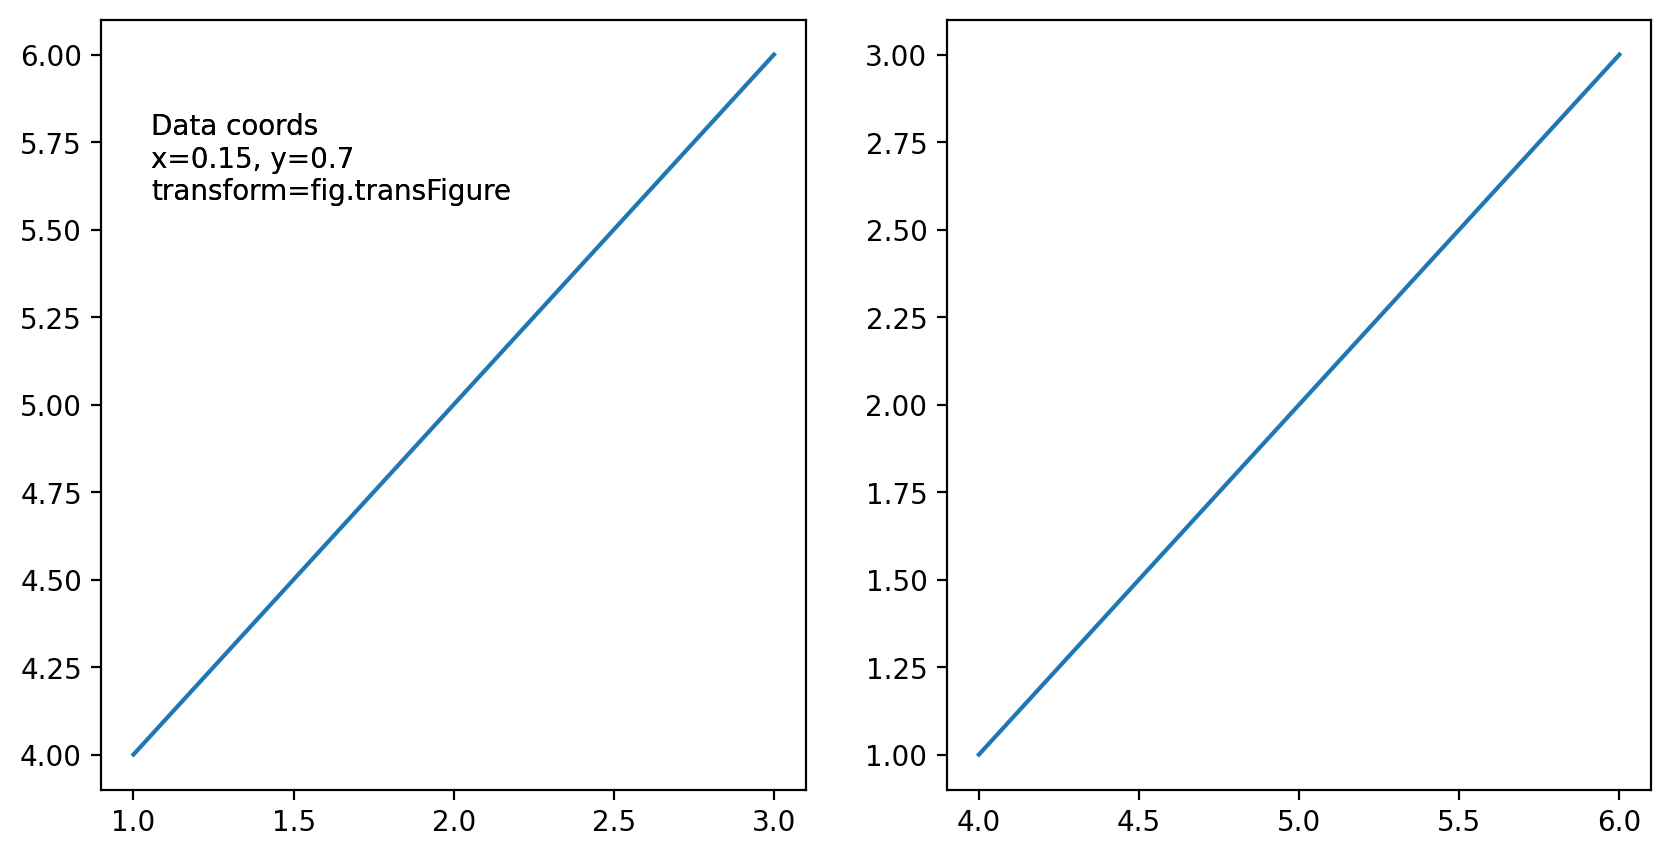

In [75]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Figure coordinates
ax[0].text(
   x=0.15, y=0.7,
   s='Data coords\nx=0.15, y=0.7\ntransform=fig.transFigure',
   transform=fig.transFigure,
   fontsize=10,
)

# This is equivalent to the previous one: it will be displayed in the same position
ax[1].text(
   x=0.15, y=0.7,
   s='Data coords\nx=0.15, y=0.7\ntransform=fig.transFigure',
   transform=fig.transFigure,
   fontsize=10,
)

plt.show()

## Relative to x-axis and to y-axis

Thanks to the `ax.get_xaxis_transform()` and `ax.get_yaxis_transform()` functions, you can specify a position relative to the x-axis or the y-axis while the other coordinate is in data coordinates.


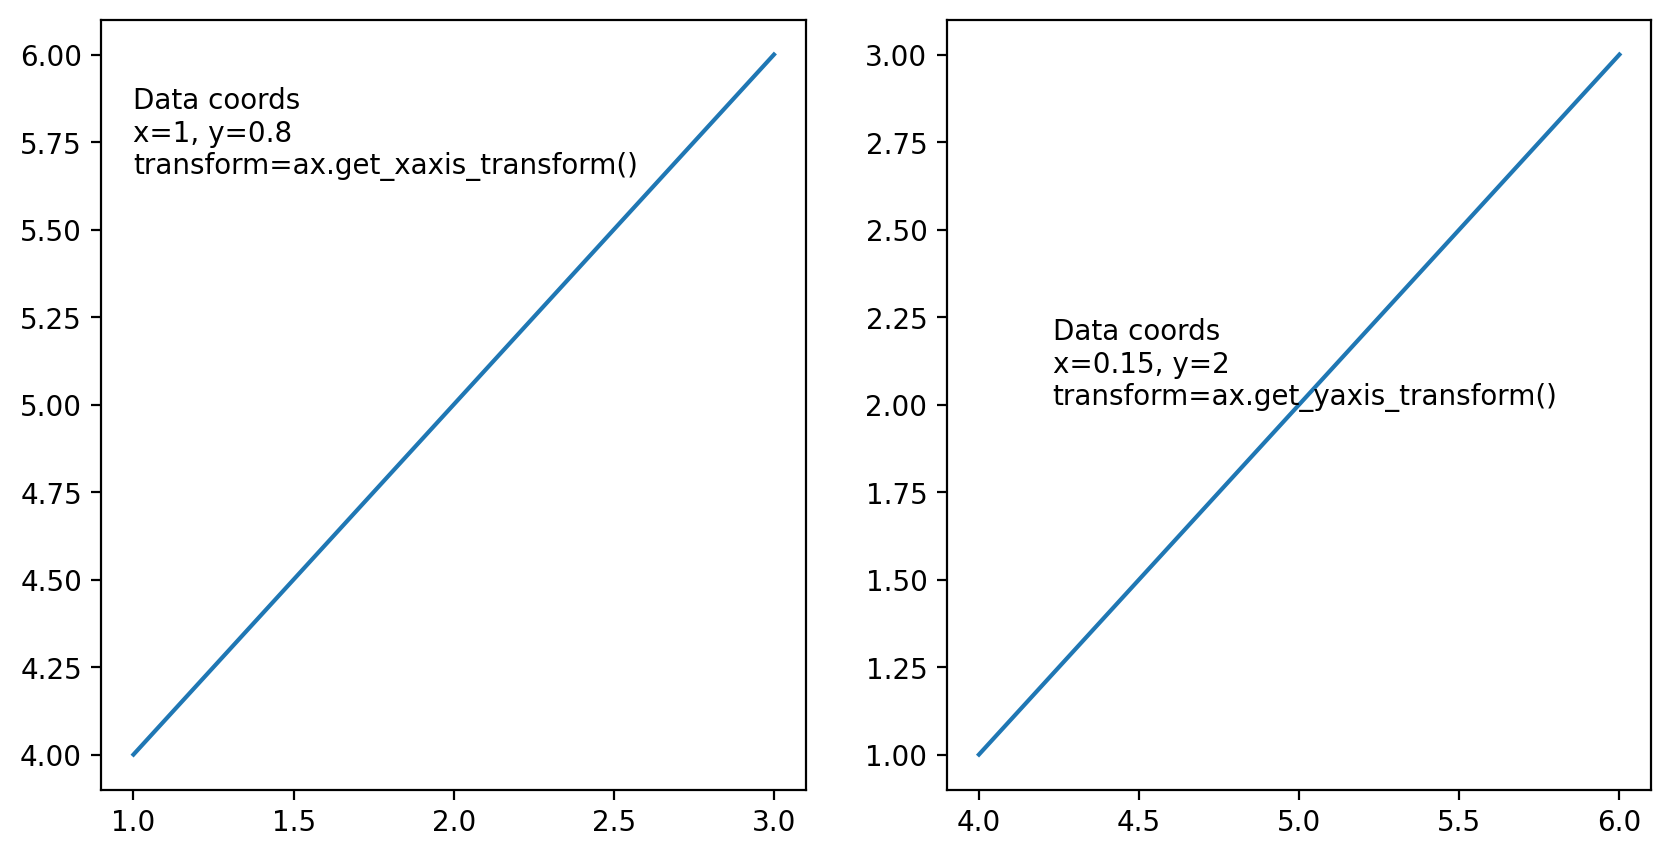

In [76]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Semi-blended transformation: x in data coordinates, y in axes coordinates
ax[0].text(
   x=1, y=0.8,
   s='Data coords\nx=1, y=0.8\ntransform=ax.get_xaxis_transform()',
   transform=ax[0].get_xaxis_transform(),
   fontsize=10,
)

# Semi-blended transformation: y in data coordinates, x in axes coordinates
ax[1].text(
   x=0.15, y=2,
   s='Data coords\nx=0.15, y=2\ntransform=ax.get_yaxis_transform()',
   transform=ax[1].get_yaxis_transform(),
   fontsize=10,
)

plt.show()

## Going further

This article explains how to add patterns to charts in [matplotlib](/matplotlib).

You might be interested in:

- how to [customize matplotlib charts](/matplotlib)
